## Trade objective
A huge school of goldfish arrived at our shores. And they all brought scuba gear they want to get rid of fast. For the right price of course.

You only have two chances to offer a good price. Each one of the goldfish will accept the lowest bid that is over their reserve price. There’s a constant desire for scuba gear on the archipelago. So, at the end of the round, you’ll be able to sell them for 1000 SeaShells a piece. Your goal is to set prices that ensure a profitable trade with as many goldfish as possible.

Once you are satisfied with your strategy and input, use the ‘Submit manual trade’ button to lock it in. Note that you can (re)submit new strategies as long as the round is still in progress. As soon as the round ends, the trading strategy that was submitted last will be processed.

Good luck and have fun trading!

## BUYING SCUBA GEAR
Set your prices to buy scuba gear. You can set a lowest and a highest bid. Whilst not every goldfish has the same reserve price, you know the distribution of their reserve prices. The reserve price will be no lower than 900 and no higher than 1000. The probability scales linearly from least likely at 900 to most likely at 1000.

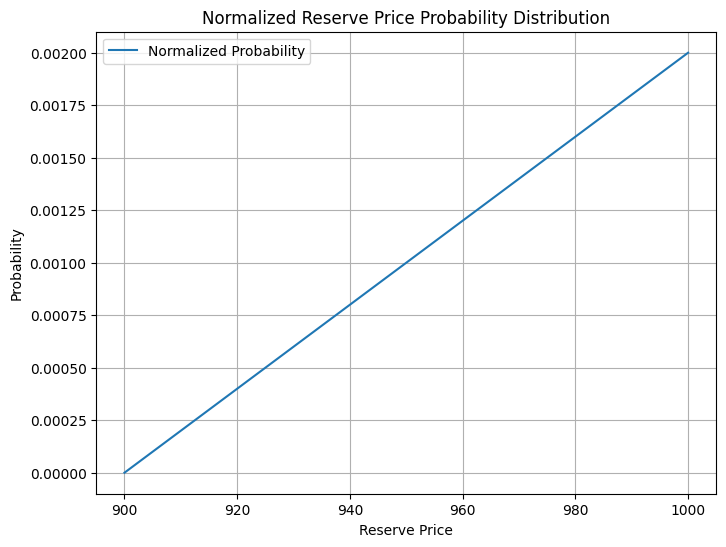

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the reserve price range
reserve_price_min = 900
reserve_price_max = 1000

# Create an array of reserve prices
reserve_prices = np.linspace(reserve_price_min, reserve_price_max, num=1000)

# Calculate the linearly scaled probabilities
probabilities = (reserve_prices - reserve_price_min) / (reserve_price_max - reserve_price_min)

# Normalize the probabilities
normalized_probabilities = probabilities / np.sum(probabilities)

# Plot the normalized distribution
plt.figure(figsize=(8, 6))
plt.plot(reserve_prices, normalized_probabilities, label="Normalized Probability")
plt.xlabel("Reserve Price")
plt.ylabel("Probability")
plt.title("Normalized Reserve Price Probability Distribution")
plt.grid(True)
plt.legend()
plt.show()


First few integer samples:
[966 982 937 928 967 994 978 957 963 977]


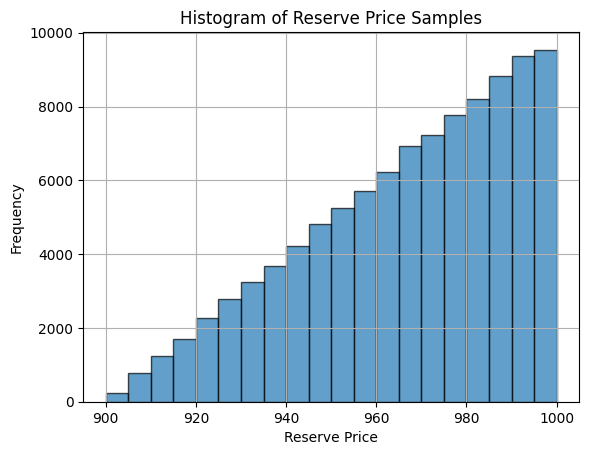

In [27]:
import numpy as np

# Define the reserve price range
reserve_price_min = 900
reserve_price_max = 1000

# Create an array of reserve prices
reserve_prices = np.linspace(reserve_price_min, reserve_price_max, num=1000)

# Calculate the linearly scaled probabilities
probabilities = (reserve_prices - reserve_price_min) / (reserve_price_max - reserve_price_min)

# Normalize the probabilities
normalized_probabilities = probabilities / np.sum(probabilities)

# Draw 1000 integer samples from the distribution
samples = np.random.choice(reserve_prices, size=100000, p=normalized_probabilities).astype(int)

# Print the first few integer samples
print("First few integer samples:")
print(samples[:10])

# Create a histogram for the integer samples
plt.hist(samples, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Reserve Price")
plt.ylabel("Frequency")
plt.title("Histogram of Reserve Price Samples")
plt.grid(True)
plt.show()


In [28]:
profit = 0
profits = []
prices = []
maxprofit = 0
maxindex = (0,0)

for small in range(900,1001):
    for large in range(small,1001):
        for sample in samples:
            if small > sample:
                profit = profit + 1000-small
            elif large > sample:
                profit = profit + 1000-large
        if profit > maxprofit:
            maxprofit = profit
            maxindex = (small, large)
        profits.append(profit)
        prices.append((small, large))
        profit = 0
        


In [30]:
print(maxprofit)
print(maxindex)

2042336
(952, 978)


In [33]:
print(max(profits))
print(profits.index(2042336))
print(prices[3952])


2042336
3952
(952, 978)
